# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:

#1. Importing Libraries and Loading Data
import pandas as pd
import numpy as np

#1. For Data Cleansing and Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import impute
from sklearn import preprocessing

#1. For Data Preparation for Model Building
from sklearn.pipeline import Pipeline

#1. For Principal Component Analysis and Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

#1. For Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#1. For Model Evaluation
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#1. For Model Evaluation
from scipy import stats
from scipy.stats import zscore
from scipy.spatial import distance

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#1. Warnings - to keep the notebook clean and tidy
import warnings 
warnings.filterwarnings('ignore')



### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv',encoding='unicode_escape') # read the data and encoding it to unicode escape to avoid errors ie. non-ascii characters so that it can be read properly by the pandas library 

In [3]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0


In [4]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True) # creating a copy of the dataframe & deep=True means it will create a deep copy of the dataframe ie. the changes made in the new dataframe will not affect the original dataframe
    print("Shape of the dataset",df.shape)
    print("*"*31)
    print(df.info())
    
basic_info(df)

Shape of the dataset (2240, 27)
*******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         224

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


In [6]:
""" def treat_missing_values(df):
    '''Function to treat the missing data by filling with mean'''
    df_filled = df.fillna(df.mean())
    return df_filled

df = treat_missing_values(df) """

" def treat_missing_values(df):\n    '''Function to treat the missing data by filling with mean'''\n    df_filled = df.fillna(df.mean())\n    return df_filled\n\ndf = treat_missing_values(df) "

In [7]:
def treat_missing_values(df):
    '''Function to treat the missing data in Income column by filling with mean'''
    df['Income'] = df['Income'].fillna(df['Income'].mean())
    return df

df = treat_missing_values(df)

# Different fillna methods are stat, mean, median, mode, ffill, bfill, pad, backfill, None etc.

In [8]:
df.shape

(2240, 27)

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [10]:
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [11]:
def check_duplicates(df):
    '''Function to check for duplicate records in a DataFrame'''
    duplicates = df.duplicated()
    return duplicates.any()

has_duplicates = check_duplicates(df)
print(f"Are there duplicates in the DataFrame? {'Yes' if has_duplicates else 'No'}")

Are there duplicates in the DataFrame? No


In [12]:
df.duplicated().sum()

0

### 5. Drop the columns which you think redundant for the analysis 

In [13]:
df = df.drop(columns=['ID','Dt_Customer'], axis=1) # dropping the columns ID and dt_Customer as they are not useful for the analysis and axis=1 means we are dropping the columns

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [14]:
unique_categories = df['Marital_Status'].unique()
print(unique_categories)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [15]:
num_unique_categories = df['Marital_Status'].nunique()
print(num_unique_categories)

8


In [16]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
# Define the mapping for the new groups
mapping = {'Married': 'relationship', 'Together': 'relationship', 
           'Divorced': 'Single', 'Widow': 'Single', 
           'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'}

# Apply the mapping to the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace(mapping)

In [18]:
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [19]:
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1) # summing up the total expenses of the customers and creating a new column Total_Expenses in the dataframe and axis=1 means we are summing up the columns

In [20]:
print(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Expenses']].head())

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  Total_Expenses  
0            88            1617  
1             6              27  
2            42             776  
3             5              53  
4            15             422  


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [21]:
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [22]:
print(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Num_Total_Purchases']].head())

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumDealsPurchases  \
0                8                   10                  4                  3   
1                1                    1                  2                  2   
2                8                    2                 10                  1   
3                2                    0                  4                  2   
4                5                    3                  6                  5   

   Num_Total_Purchases  
0                   25  
1                    6  
2                   21  
3                    8  
4                   19  


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [23]:
df['Kids'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
print(df[['Kidhome', 'Teenhome', 'Kids']].head())

   Kidhome  Teenhome  Kids
0        0         0     0
1        1         1     2
2        0         0     0
3        1         0     1
4        1         0     1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [24]:
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
print(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']].head())

   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Response  TotalAcceptedCmp  
0         1                 1  
1         0                 0  
2         0                 0  
3         0                 0  
4         0                 0  


### 11. Drop those columns which we have used above for obtaining new features

In [25]:
df = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 
                      'Kidhome', 'Teenhome', 
                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']) # dropping the columns as they are not useful for the analysis and response is the target variable ie. the variable we are trying to predict

In [26]:
df.shape

(2240, 11)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [27]:
dfc = df.copy() # creating a copy of the dataframe

In [28]:
# Data engineering - creating new columns from existing columns or modifying the existing columns
import datetime

# Extract 'age' from 'Year_Birth'
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

# Drop the 'Year_Birth' column
df = df.drop(columns=['Year_Birth'])

In [29]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43


In [30]:
dfc = df.copy() # creating a copy of the dataframe

### 13. Encode the categorical variables in the dataset

In [31]:
""" df_encoded = pd.get_dummies(df) """

' df_encoded = pd.get_dummies(df) '

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   NumWebVisitsMonth    2240 non-null   int64  
 5   Complain             2240 non-null   int64  
 6   Total_Expenses       2240 non-null   int64  
 7   Num_Total_Purchases  2240 non-null   int64  
 8   Kids                 2240 non-null   int64  
 9   TotalAcceptedCmp     2240 non-null   int64  
 10  Age                  2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


In [33]:

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [34]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,67
1,2,0,46344.0,38,5,0,27,6,2,0,70
2,2,1,71613.0,26,4,0,776,21,0,0,59
3,2,1,26646.0,26,6,0,53,8,1,0,40
4,4,1,58293.0,94,5,0,422,19,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [35]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'Age'],
      dtype='object')

In [36]:

scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [37]:
df_standardized.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [38]:

# Create a PCA object
pca = PCA()

# Fit the PCA on the standardized data
pca.fit(df_standardized)

# Calculate the cumulative sum of the explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 90-95% of the variance
n_components_90 = np.where(cumulative_variance > 0.90)[0][0] + 1
n_components_95 = np.where(cumulative_variance > 0.95)[0][0] + 1

print(f"Number of components that explain 90% variance: {n_components_90}")
print(f"Number of components that explain 95% variance: {n_components_95}")

Number of components that explain 90% variance: 8
Number of components that explain 95% variance: 9


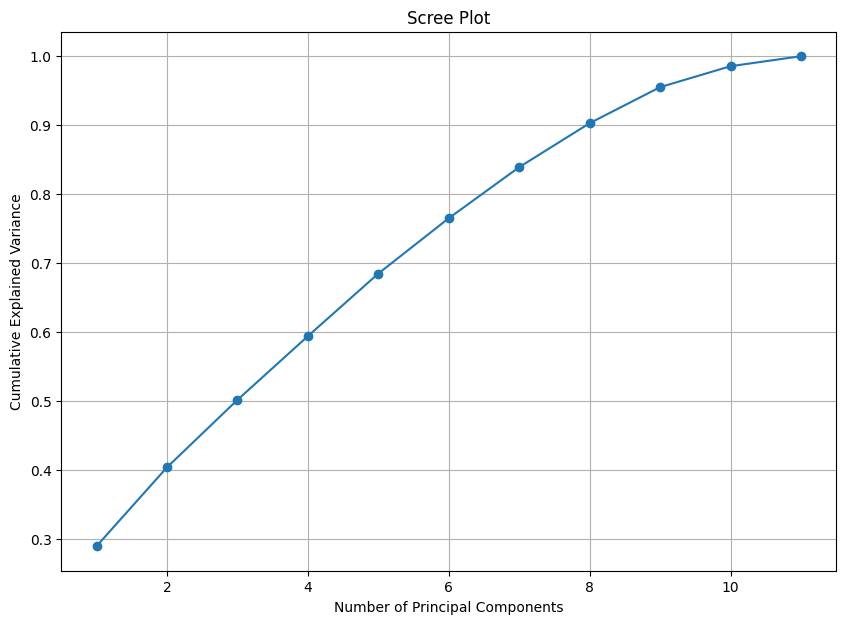

In [39]:

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

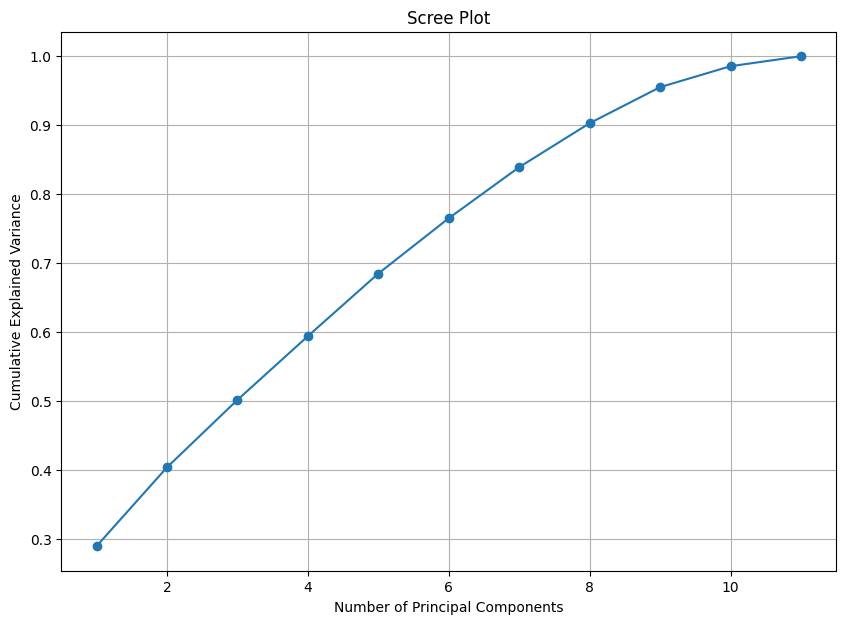

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the covariance matrix
cov_matrix = np.cov(df_standardized.T)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and their corresponding eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calculate the explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create a scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

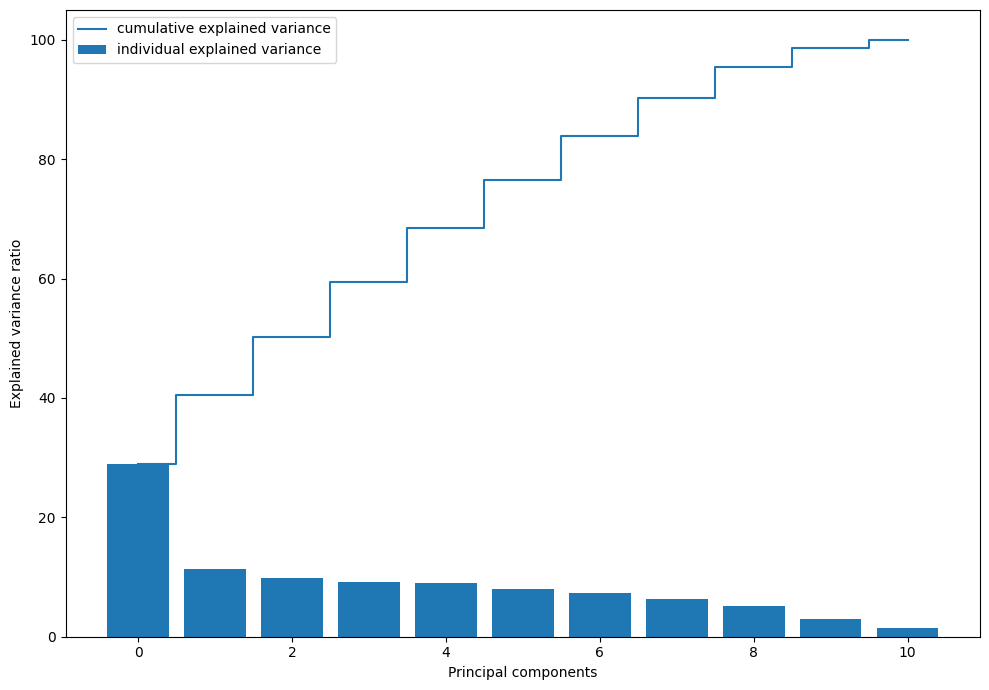

In [41]:

import numpy as np
import matplotlib.pyplot as plt

# Covariance matrix
cov_matrix = np.cov(df_standardized.T)

# Eigenvalues and Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Scree plot
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Diagram
plt.figure(figsize=(10, 7))
plt.bar(range(len(var_exp)), var_exp, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# The inference from the scree plot is that the first 8 principal components explain about 90-95% of the variance in the data so we can choose 8 principal components as optimal number of components.

In [42]:

# Create a PCA object
pca = PCA(n_components=9)  # we need at least 9 components to select the 8th and 9th

# Fit and transform the PCA on the standardized data
df_pca = pca.fit_transform(df_standardized)

# Select the 8th and 9th components
df_pca_8_9 = df_pca[:, [7, 8]]  # indices are 0-based, so the 8th component is at index 7 and the 9th at index 8

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [44]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=n_components_90)  # or n_components_95

# Fit and transform the PCA on the standardized data
df_pca = pca.fit_transform(df_standardized)

In [45]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(df_standardized), columns=[f'PC{i+1}' for i in range(8)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


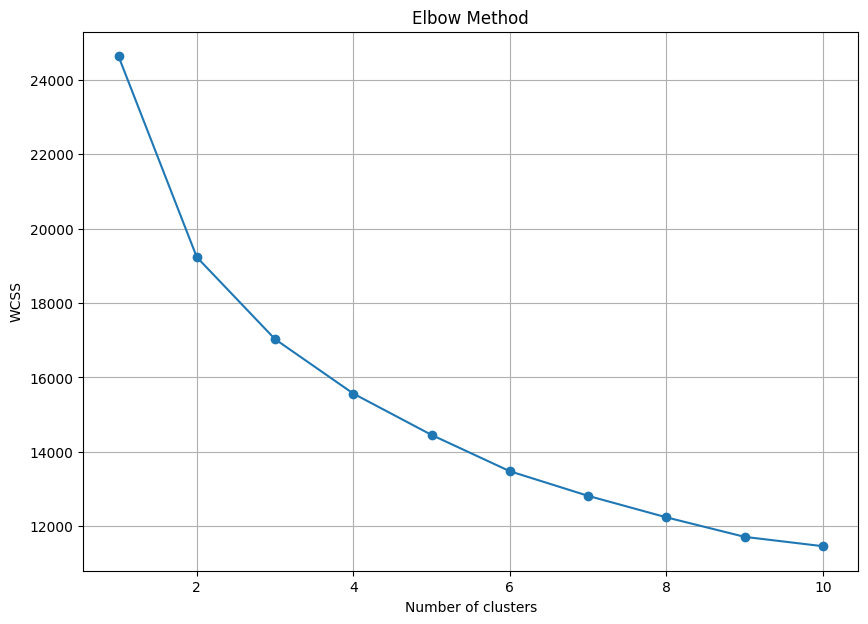

In [46]:
## Find the optimal number of clusters(K) using the elbow method

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Inertia for 1 clusters: 24640.000000000015
Inertia for 2 clusters: 19234.610062037755
Inertia for 3 clusters: 17027.766243939746
Inertia for 4 clusters: 15563.869352385995
Inertia for 5 clusters: 14451.313745000696
Inertia for 6 clusters: 13474.7279677191
Inertia for 7 clusters: 12812.82306482819
Inertia for 8 clusters: 12234.47555721002
Inertia for 9 clusters: 11709.578665312449
Inertia for 10 clusters: 11458.279002622163


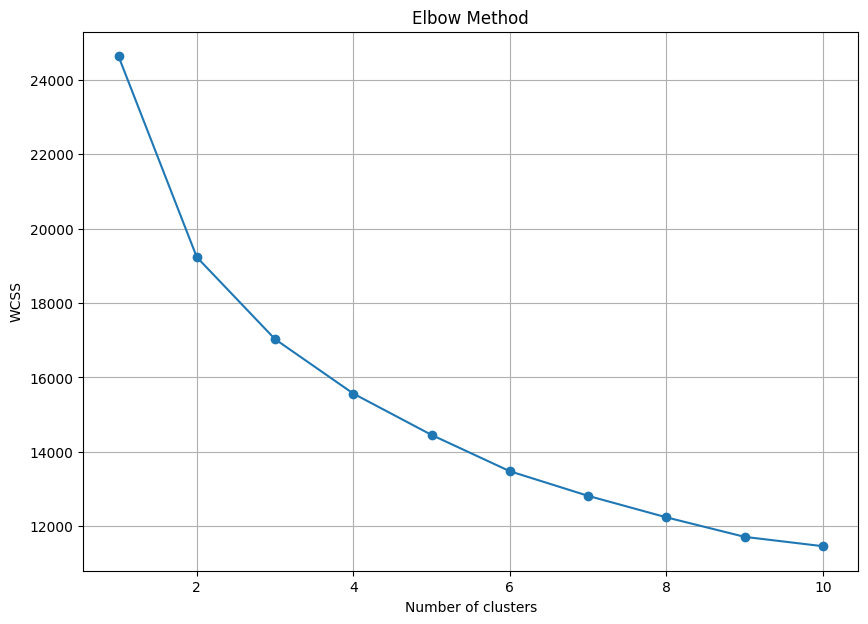

In [47]:

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)
    print(f"Inertia for {i} clusters: {kmeans.inertia_}")

# Plot the WCSS values
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

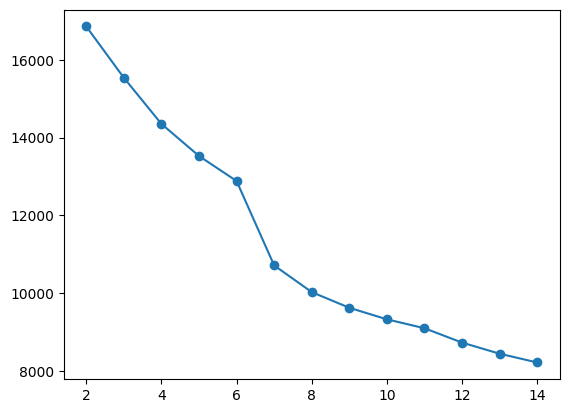

In [48]:

cluster_errors = []
cluster_range = range(2,15)

for num_clusters in cluster_range:
    cluster = KMeans(num_clusters, random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors':cluster_errors})

plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'],marker='o')

# The inference from the elbow method is that the inertia decreases significantly from K=3. Hence we can choose 3 as the optimal number of clusters.

In [49]:
## Apply KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(pca_df)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [50]:
## Check the Cluster Centers and the Labels

label = pd.DataFrame(kmeans.labels_, columns=['label'])
kmeans_df = pd.concat([pca_df, label], axis=1)  
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,1
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,2
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,1
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,2
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,0


In [51]:
kmeans_df['label'].value_counts() # checking the number of customers in each cluster

label
2    992
0    724
1    524
Name: count, dtype: int64

<Axes: xlabel='PC1', ylabel='PC2'>

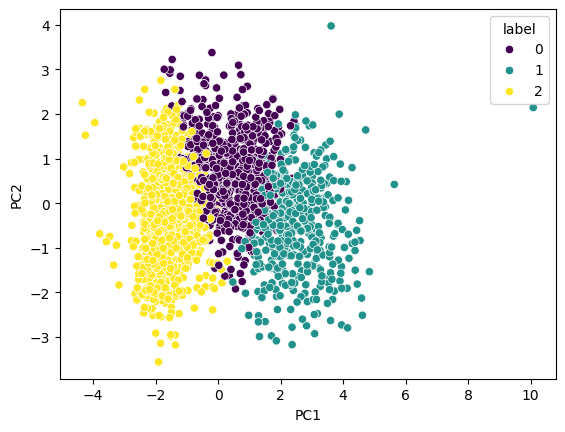

In [52]:
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2', hue='label', palette='viridis') # scatter plot of the clusters using the first two principal components

In [53]:
""" from sklearn.cluster import KMeans

# Create a KMeans object
kmeans = KMeans(n_clusters=3)  # choose the number of clusters

# Fit the KMeans on the PCA transformed data
kmeans.fit(df_pca)

# Get the cluster labels
labels = kmeans.labels_ """

' from sklearn.cluster import KMeans\n\n# Create a KMeans object\nkmeans = KMeans(n_clusters=3)  # choose the number of clusters\n\n# Fit the KMeans on the PCA transformed data\nkmeans.fit(df_pca)\n\n# Get the cluster labels\nlabels = kmeans.labels_ '

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

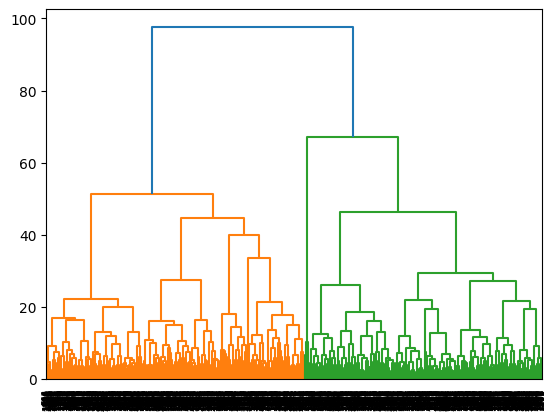

In [54]:
merge = linkage(df_standardized, method='ward')
dendrogram(merge, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [55]:

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier.fit(df_standardized)
    print(f'Silhouette Score for {i} clusters: {silhouette_score(df_standardized, hier.labels_)}')

Silhouette Score for 2 clusters: 0.19083932398841263
Silhouette Score for 3 clusters: 0.19859065923121116
Silhouette Score for 4 clusters: 0.11245037433445754
Silhouette Score for 5 clusters: 0.1142462175685332
Silhouette Score for 6 clusters: 0.13181821517770267
Silhouette Score for 7 clusters: 0.13957002140192074
Silhouette Score for 8 clusters: 0.1390706310270007
Silhouette Score for 9 clusters: 0.11337088108590954
Silhouette Score for 10 clusters: 0.11192131225156017
Silhouette Score for 11 clusters: 0.10382081162153395
Silhouette Score for 12 clusters: 0.10893099764800893
Silhouette Score for 13 clusters: 0.1023394958833542
Silhouette Score for 14 clusters: 0.09549869159604249


In [56]:

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')  # choose the number of clusters

# Fit the AgglomerativeClustering on the original data
agg_clustering.fit(df_standardized)

# Get the cluster labels
labels_agg = agg_clustering.labels_


In [59]:
# Add the cluster labels to the DataFrame
df_label1 = pd.DataFrame(agg_clustering.labels_, columns=['Labels'])

df_label1['Labels'].value_counts()

Labels
0    1169
1    1050
2      21
Name: count, dtype: int64

In [63]:
df_label1.head()

,Labels
0,0
1,1
2,0
3,1
4,0


In [61]:
## joining the label dataframe with unscaled initial cleaned dataframe(dfc)

df_agg = dfc.join(df_label1)
df_agg.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43,0


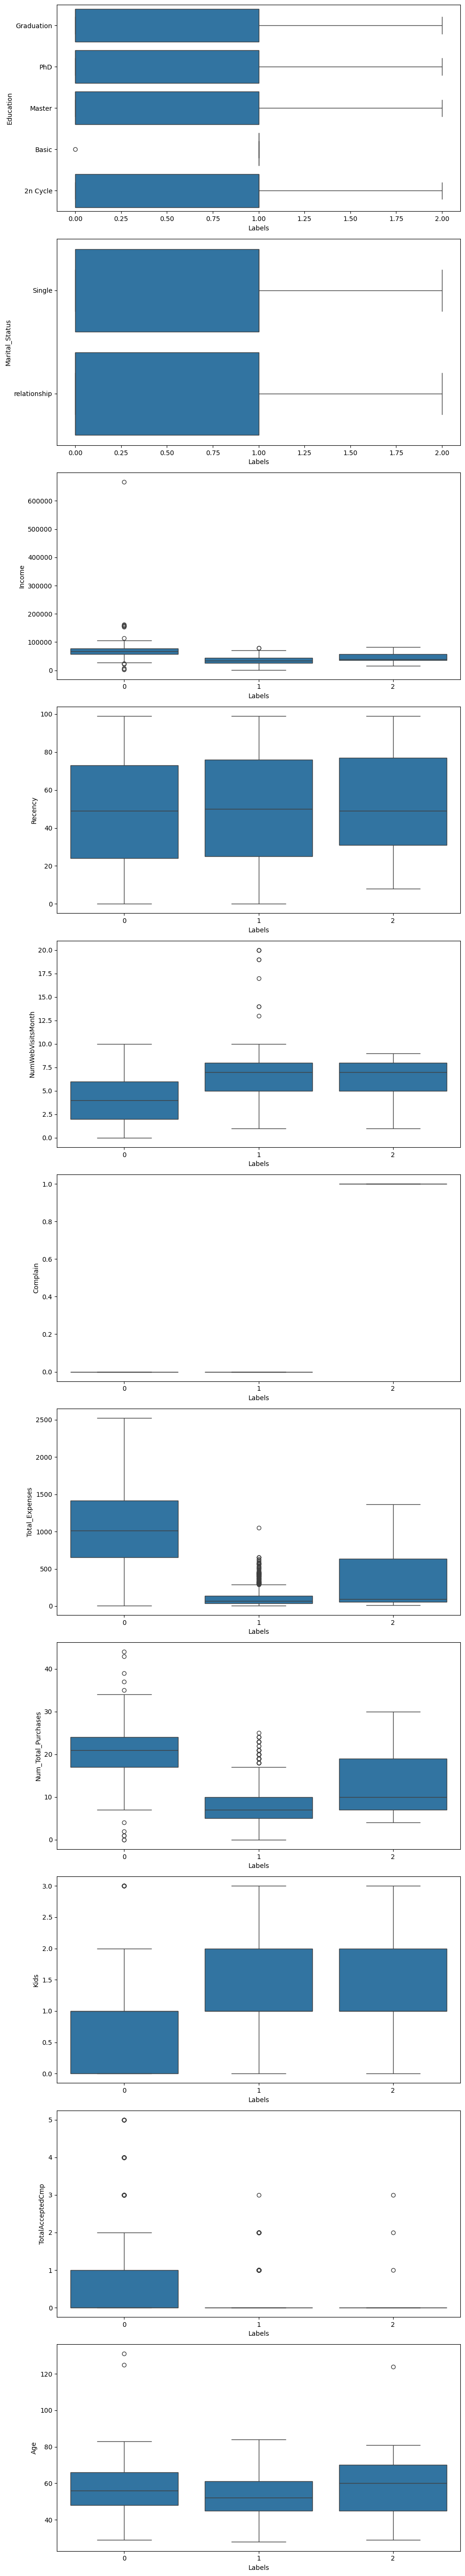

In [64]:
# Bivariate Analysis between the clusters and the features using boxplots to see the distribution of the features in each cluster and to see the differences between the clusters in terms of the features
import seaborn as sns

# List of features to compare
features = dfc.columns

# Create a figure and axes for subplots
fig, axs = plt.subplots(len(features), 1, figsize=(10, 5*len(features)))

# For each feature, create a boxplot grouped by the cluster label
for i, feature in enumerate(features):
    sns.boxplot(x='Labels', y=feature, data=df_agg, ax=axs[i])

plt.tight_layout()
plt.show()

In [67]:
# Group the data by the cluster label and 'Education', and count the number of occurrences of each combination
grouped_labels_education = df_agg.groupby(['Labels', 'Education']).size()

# Print the counts
print(grouped_labels_education)

Labels  Education 
0       2n Cycle       89
        Basic           1
        Graduation    597
        Master        196
        PhD           286
1       2n Cycle      110
        Basic          53
        Graduation    516
        Master        172
        PhD           199
2       2n Cycle        4
        Graduation     14
        Master          2
        PhD             1
dtype: int64


In [66]:
# Group the data by the cluster label and calculate descriptive statistics for the 'Education' feature
grouped_education = df_agg.groupby('Labels')['Education'].describe()

# Print the descriptive statistics
print(grouped_education)

       count unique         top freq
Labels                              
0       1169      5  Graduation  597
1       1050      5  Graduation  516
2         21      4  Graduation   14


In [65]:
# Group the data by the cluster label and calculate descriptive statistics for each group
grouped = df_agg.groupby('Labels').describe()

# Print the descriptive statistics
print(grouped)

        Income                                                         \
         count          mean           std      min      25%      50%   
Labels                                                                  
0       1169.0  67622.636025  23536.162376   2447.0  57113.0  67272.0   
1       1050.0  35269.422399  12698.767032   1730.0  26243.5  34964.5   
2         21.0  45242.285714  19223.158027  15716.0  36640.0  38998.0   

                          Recency             ... TotalAcceptedCmp       \
            75%       max   count       mean  ...              75%  max   
Labels                                        ...                         
0       77142.0  666666.0  1169.0  48.397776  ...              1.0  5.0   
1       44112.5   79146.0  1050.0  49.822857  ...              0.0  3.0   
2       58113.0   83257.0    21.0  53.047619  ...              0.0  3.0   

           Age                                                       
         count       mean        std   m

Opportunities presented by significant age variability within Cluster 2:
Targeted Product Offerings: The significant age variability within Cluster 2 indicates a diverse demographic composition with varying preferences, lifestyles, and needs. Businesses can leverage this diversity to offer a range of products and services tailored to different age segments within the cluster.

Lifestyle and Life Stage Marketing: Understanding the age distribution within Cluster 2 enables businesses to tailor marketing messages and product offerings to specific life stages and lifestyle preferences. For example, products and services targeting younger consumers may focus on technology, entertainment, and experiential offerings, while those aimed at older consumers may emphasize health, wellness, and retirement planning.

Cross-Generational Marketing: Cluster 2's age variability presents opportunities for cross-generational marketing initiatives that bridge generational divides and appeal to consumers across different age groups. Businesses can develop campaigns and promotions that resonate with shared values, experiences, and aspirations, fostering connections across diverse age segments.

Innovation and Product Development: By engaging with consumers across different age cohorts within Cluster 2, businesses can gather insights and feedback to drive innovation and product development. Understanding the evolving needs and preferences of diverse age groups enables businesses to introduce new features, functionalities, and experiences that address emerging market trends and consumer demands.

### Leveraging income variability in Cluster 0 for a combined marketing strategy:
Segment-Specific Targeting: Businesses can leverage income variability in Cluster 0 to develop segment-specific marketing strategies that align with the income levels and purchasing power of different consumer segments. By segmenting customers based on income, businesses can tailor promotional offers, pricing strategies, and product bundles to meet the diverse affordability constraints and value perceptions of consumers within Cluster 0.

Complementary Product Offerings: Income variability within Cluster 0 provides an opportunity for businesses to offer complementary product lines and pricing tiers that cater to different income segments within the cluster. By aligning product portfolios with income levels, businesses can optimize revenue generation and customer acquisition across diverse market segments.

Cross-Promotional Opportunities: Collaborative marketing initiatives that leverage income and age variability across Clusters 0 and 2 can enhance brand visibility, customer engagement, and sales conversion. Businesses can explore cross-promotional opportunities that combine product offerings, discounts, and incentives to appeal to diverse consumer demographics and drive incremental revenue growth.

Personalized Customer Experiences: Leveraging data analytics and customer insights, businesses can personalize customer experiences and communications to address the unique preferences, lifestyles, and purchase behaviors of consumers within Clusters 0 and 2. By tailoring marketing messages, product recommendations, and promotional offers based on income and age segmentation, businesses can enhance customer engagement, loyalty, and lifetime value.

In summary, by strategically leveraging age variability within Cluster 2 and income variability within Cluster 0, businesses can develop integrated marketing strategies that capitalize on demographic diversity, consumer preferences, and market dynamics. By segmenting customers based on age and income, businesses can customize product offerings, pricing strategies, and promotional initiatives to drive customer acquisition, retention, and revenue optimization across diverse market segments.

In [73]:
# Import the necessary function
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_agg['Labels'], df_agg['Education'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}, p-value: {p}")

# The p-value is less than 0.05, so we reject the null hypothesis and conclude that there is a significant association between the 'Labels' and 'Education' features.

Chi-square value: 77.10633428897349, p-value: 1.865566820893723e-13


In [70]:
df_agg.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'Age', 'Labels'],
      dtype='object')

In [75]:
# Import the necessary function
from scipy.stats import chi2_contingency

# List of features
features = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
            'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
            'TotalAcceptedCmp', 'Age']

# Loop over each feature
for feature in features:
    # Create a contingency table
    contingency_table = pd.crosstab(df_agg['Labels'], df_agg[feature])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Feature: {feature}, Chi-square value: {chi2}, p-value: {p}")

Feature: Education, Chi-square value: 77.10633428897349, p-value: 1.865566820893723e-13
Feature: Marital_Status, Chi-square value: 3.5838542155933713, p-value: 0.1666387292469882
Feature: Income, Chi-square value: 4441.529740518962, p-value: 4.506385868009803e-08
Feature: Recency, Chi-square value: 231.6061142413643, p-value: 0.051050069291744535
Feature: NumWebVisitsMonth, Chi-square value: 517.8424109554417, p-value: 2.629833749524528e-90
Feature: Complain, Chi-square value: 2240.0, p-value: 0.0
Feature: Total_Expenses, Chi-square value: 2820.3853881669447, p-value: 1.0019099142998452e-23
Feature: Num_Total_Purchases, Chi-square value: 1679.6905980295319, p-value: 2.167707162126632e-300
Feature: Kids, Chi-square value: 352.89644511555554, p-value: 3.6866992034142055e-73
Feature: TotalAcceptedCmp, Chi-square value: 212.41951320395975, p-value: 4.1176011675622316e-40
Feature: Age, Chi-square value: 311.5179406451124, p-value: 8.170373819094156e-20


### Visualization and Interpretation of results

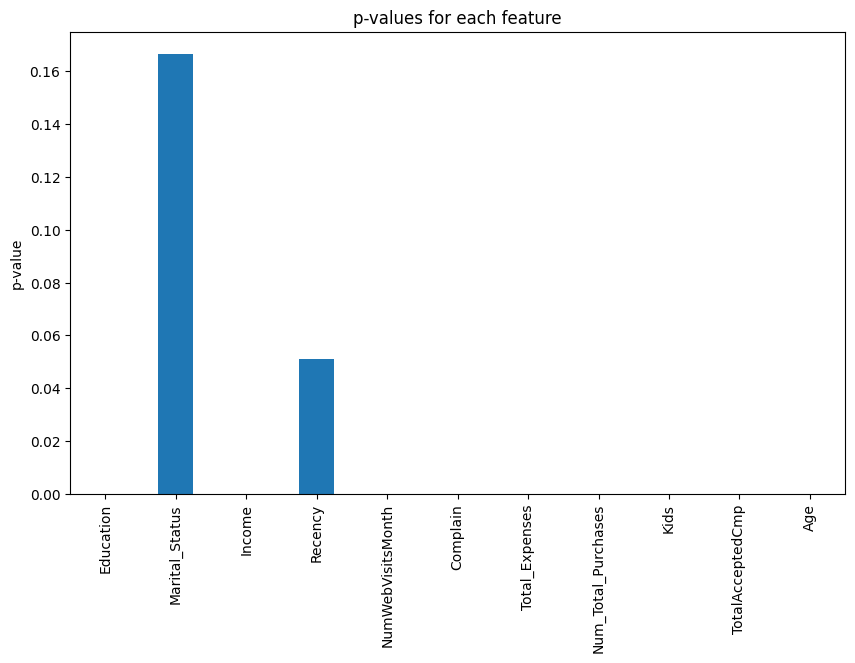

In [76]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the p-values
p_values = {}

# Loop over each feature
for feature in features:
    # Create a contingency table
    contingency_table = pd.crosstab(df_agg['Labels'], df_agg[feature])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the p-value in the dictionary
    p_values[feature] = p

# Convert the dictionary to a Series for easier plotting
p_values_series = pd.Series(p_values)

# Create a bar plot of the p-values
plt.figure(figsize=(10, 6))
p_values_series.plot(kind='bar')
plt.ylabel('p-value')
plt.title('p-values for each feature')
plt.show()

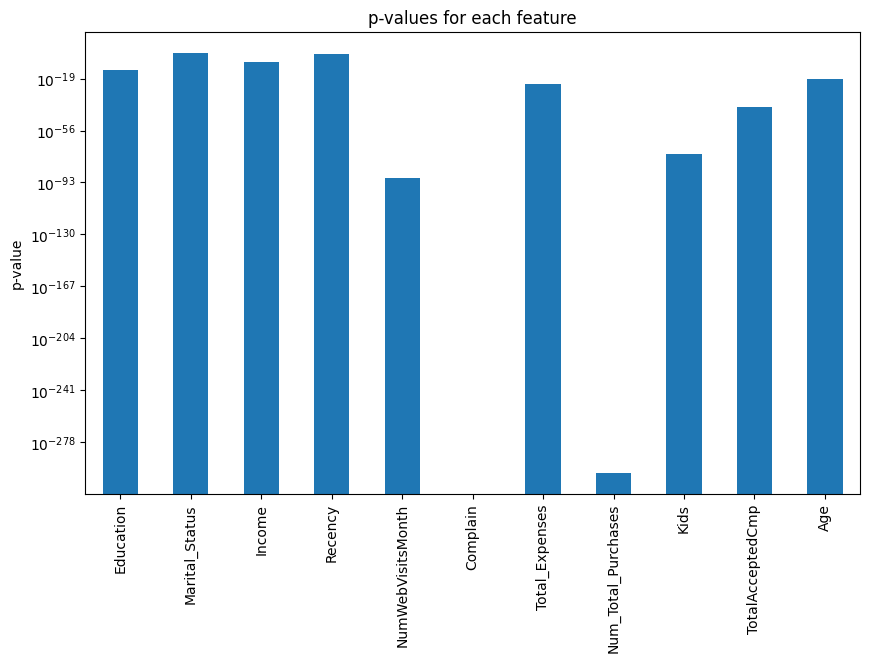

In [77]:
# Create a bar plot of the p-values
plt.figure(figsize=(10, 6))
p_values_series.plot(kind='bar')
plt.ylabel('p-value')
plt.title('p-values for each feature')
plt.yscale('log')  # Use a logarithmic scale for the y-axis to better visualize the smaller p-values as well
plt.show()

The chi-square test is used to determine whether there is a significant association between two categorical variables. In this case, it's being used to test the association between the 'Labels' and each of the features.

The p-value is the probability of observing a chi-square statistic as extreme as, or more extreme than, the observed statistic under the null hypothesis (which is that there is no association between the variables). 

If the p-value is less than a chosen significance level (commonly 0.05), the null hypothesis is rejected and it's concluded that there is a significant association between the variables.

Here's the inference for each feature:

- 'Education': Significant association with 'Labels' (p < 0.05)
- 'Marital_Status': No significant association with 'Labels' (p > 0.05)
- 'Income': Significant association with 'Labels' (p < 0.05)
- 'Recency': No significant association with 'Labels' (p > 0.05)
- 'NumWebVisitsMonth': Significant association with 'Labels' (p < 0.05)
- 'Complain': Significant association with 'Labels' (p < 0.05)
- 'Total_Expenses': Significant association with 'Labels' (p < 0.05)
- 'Num_Total_Purchases': Significant association with 'Labels' (p < 0.05)
- 'Kids': Significant association with 'Labels' (p < 0.05)
- 'TotalAcceptedCmp': Significant association with 'Labels' (p < 0.05)
- 'Age': Significant association with 'Labels' (p < 0.05)


This shows that 'Marital_Status' and 'Recency' have less direct influence so it can be stated that all features except 'Marital_Status' and 'Recency' have a significant association with 'Labels'.

-----
##### ***** Empowering Minds, Enabling Excellence - The Journey with Great Learning:) *****
-----